In [31]:
import matplotlib.pyplot as plt
import ex_1.main as main
from perceptrons.simple_step_perceptron import SimpleStepPerceptron

In [32]:
learning_rates_results = "ex_1/resources/learning_rates.txt"
config_file_path = "ex_1/resources/config.json"
results_file_path = "ex_1/resources/perceptron_data.txt"
open(learning_rates_results, "w").close()

In [33]:
training_set, expected_output, learn_rate, epoch_limit, execution_count, random_weights = main.parse_config(config_file_path)
step = 0.05
for val in range(1, 60):
    multiple_results_path = f"ex_1/resources/multiple_results_{val*step}.txt"
    open(multiple_results_path, "w").close()
    p = SimpleStepPerceptron(expected_output, training_set, val*step)

    for j in range(execution_count):
        open(results_file_path, "w").close()
        w_min, e_min, i = p.learn(epoch_limit*len(training_set), lambda i, error, weights: open(results_file_path, "a").write("{},{}\n".format(i, error)), random_weights=random_weights)
        open(multiple_results_path, "a").write("{},{}\n".format(i, e_min))
    i_avg, i_std, e_avg, e_std = main.parse_results_for_rate(multiple_results_path)
    open(learning_rates_results, "a").write("{},{},{},{},{}\n".format(val*step, i_avg, i_std, e_avg, e_std))

W min[0.18352448 0.07725916 0.18928931]
W min[0.16920366 0.41666435 0.2942741 ]
W min[0.55717305 0.16653124 0.64309697]
W min[0.62237036 0.067374   0.66021252]
W min[0.11963714 0.22428284 0.19206575]
W min[0.2029149  0.2452486  0.20533707]
W min[0.09792138 0.08619521 0.15860665]
W min[0.22814711 0.28172179 0.32975559]
W min[0.09833312 0.12371464 0.10281126]
W min[0.18504163 0.63996137 0.54630751]
W min[0.50231211 0.54835797 0.15910055]
W min[0.31103448 0.16048005 0.2348265 ]
W min[0.18579972 0.19575403 0.21761316]
W min[0.25802637 0.31006145 0.19140123]
W min[0.18469118 0.38392489 0.45782392]
W min[0.50640756 0.16276417 0.50703655]
W min[0.37683464 0.09454638 0.45169675]
W min[0.09022365 0.09601759 0.07385181]
W min[0.11782097 0.20708785 0.20942527]
W min[0.20954122 0.24904839 0.28668826]
W min[0.15098069 0.48747396 0.43209544]
W min[0.11064544 0.05830382 0.12641433]
W min[0.29066351 0.4697906  0.18200963]
W min[0.33748642 0.6543077  0.47881245]
W min[0.69058857 0.63160679 0.38262563]


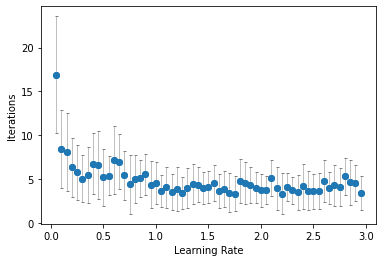

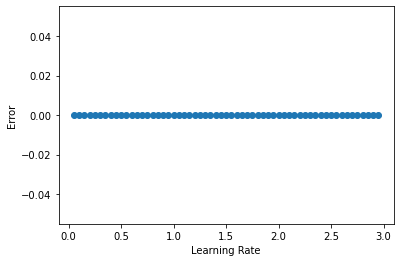

In [34]:
learn_rates, it, it_dev, err, err_dev = main.parse_rates_results(learning_rates_results)

#plot learning rates vs iterations with error and learning raes vs error with error
plt.figure(1)
plt.xlabel("Learning Rate")
plt.ylabel("Iterations")
plt.scatter(learn_rates, it)
plt.errorbar(learn_rates, it, yerr=it_dev, ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")
plt.figure(2)
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.scatter(learn_rates, err)